In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import gym
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import json
import numpy as np

Using TensorFlow backend.


### Agent and Environment Description

* observation:  
    (Cart Position ,  Cart Velocity ,  Pole Angle ,  Pole Velocity At Tip)
 
* Actions:  
    0 Push cart to the left; 1 Push cart to the right

* Reward:  
    Reward is for every step taken ,  including the termination step

* Starting State:  
    All observations are assigned a uniform random value between +-0.05

* Episode Termination:  
    Pole Angle is more than ±12°
    Cart Position is more than ± 2.4 
    (center of the cart reaches the edge of the display)
    Episode length is greater than 200

* reference:  
    http:  //neuro-educator.com/rl1/


In [2]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [68]:
model = Sequential()
# input: (n x 4) ( Cart Position, Cart Vel, Pole Angle, Pole Vel)
model.add(Flatten(input_shape=(1, env.observation_space.shape[0])))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))

# output: (n x 3) (left, no, right)
model.add(Dense(env.action_space.n))
model.add(Activation('linear'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_11 (Activation)   (None, 16)                0         
__________

In [70]:
# memory replay
memory = SequentialMemory(limit=50000, window_length=1)

# epsilon greedy algorithm
policy = EpsGreedyQPolicy(eps=0.001)

dqn = DQNAgent(model=model, nb_actions=env.action_space.n, gamma=0.99, memory=memory,
              nb_steps_warmup=10, target_model_update=1e-2, policy=policy)

In [71]:
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...


/home/syuntoku14/.pyenv/versions/anaconda3-5.1.0/envs/coursera/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   141/100000: episode: 1, duration: 1.329s, episode steps: 141, steps per second: 106, episode reward: 141.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.496 [0.000, 1.000], mean observation: 0.118 [-0.627, 0.709], loss: 0.175437, mean_absolute_error: 0.412029, mean_q: 0.655545
   200/100000: episode: 2, duration: 0.139s, episode steps: 59, steps per second: 423, episode reward: 59.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.100 [-0.746, 0.248], loss: 0.019771, mean_absolute_error: 0.600869, mean_q: 1.502709
   262/100000: episode: 3, duration: 0.160s, episode steps: 62, steps per second: 387, episode reward: 62.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.001 [-0.860, 0.357], loss: 0.015196, mean_absolute_error: 0.884652, mean_q: 1.923544
   291/100000: episode: 4, duration: 0.064s, episode steps: 29, steps per second: 454, episode reward: 29.000, mean reward: 1.000 [1.000, 1

   749/100000: episode: 32, duration: 0.046s, episode steps: 9, steps per second: 194, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.222 [0.000, 1.000], mean observation: 0.123 [-1.209, 1.815], loss: 0.283052, mean_absolute_error: 3.096834, mean_q: 6.037265
   758/100000: episode: 33, duration: 0.023s, episode steps: 9, steps per second: 383, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.222 [0.000, 1.000], mean observation: 0.146 [-1.136, 1.916], loss: 0.473171, mean_absolute_error: 3.142061, mean_q: 5.984330
   768/100000: episode: 34, duration: 0.024s, episode steps: 10, steps per second: 421, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.200 [0.000, 1.000], mean observation: 0.128 [-1.350, 2.137], loss: 0.402748, mean_absolute_error: 3.182236, mean_q: 6.166202
   777/100000: episode: 35, duration: 0.021s, episode steps: 9, steps per second: 425, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000]

  1986/100000: episode: 61, duration: 0.328s, episode steps: 147, steps per second: 448, episode reward: 147.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.463 [0.000, 1.000], mean observation: -0.322 [-1.960, 0.345], loss: 0.594766, mean_absolute_error: 7.157436, mean_q: 14.390363
  2099/100000: episode: 62, duration: 0.366s, episode steps: 113, steps per second: 309, episode reward: 113.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.451 [0.000, 1.000], mean observation: -0.335 [-2.047, 0.308], loss: 0.636369, mean_absolute_error: 7.618752, mean_q: 15.343749
  2233/100000: episode: 63, duration: 0.651s, episode steps: 134, steps per second: 206, episode reward: 134.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.463 [0.000, 1.000], mean observation: -0.368 [-1.884, 0.328], loss: 0.572585, mean_absolute_error: 8.075066, mean_q: 16.271688
  2368/100000: episode: 64, duration: 0.308s, episode steps: 135, steps per second: 439, episode reward: 135.000, mean reward: 

  6218/100000: episode: 90, duration: 0.343s, episode steps: 139, steps per second: 406, episode reward: 139.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.460 [0.000, 1.000], mean observation: -0.314 [-2.025, 0.277], loss: 0.426225, mean_absolute_error: 18.209860, mean_q: 37.432968
  6340/100000: episode: 91, duration: 0.293s, episode steps: 122, steps per second: 416, episode reward: 122.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.365 [-1.833, 0.349], loss: 0.466377, mean_absolute_error: 18.513510, mean_q: 38.006458
  6477/100000: episode: 92, duration: 0.299s, episode steps: 137, steps per second: 458, episode reward: 137.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.460 [0.000, 1.000], mean observation: -0.350 [-1.954, 0.318], loss: 0.814401, mean_absolute_error: 18.672670, mean_q: 38.293419
  6677/100000: episode: 93, duration: 0.780s, episode steps: 200, steps per second: 257, episode reward: 200.000, mean rewar

 10190/100000: episode: 118, duration: 0.362s, episode steps: 136, steps per second: 375, episode reward: 136.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.456 [0.000, 1.000], mean observation: -0.388 [-2.158, 0.294], loss: 0.668896, mean_absolute_error: 22.953077, mean_q: 47.008106
 10318/100000: episode: 119, duration: 0.343s, episode steps: 128, steps per second: 373, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.453 [0.000, 1.000], mean observation: -0.387 [-2.193, 0.343], loss: 0.530298, mean_absolute_error: 22.970858, mean_q: 47.062469
 10476/100000: episode: 120, duration: 0.363s, episode steps: 158, steps per second: 435, episode reward: 158.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.329 [-2.165, 0.325], loss: 0.646032, mean_absolute_error: 23.374964, mean_q: 47.897354
 10639/100000: episode: 121, duration: 0.435s, episode steps: 163, steps per second: 374, episode reward: 163.000, mean r

 14555/100000: episode: 146, duration: 0.308s, episode steps: 131, steps per second: 426, episode reward: 131.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.458 [0.000, 1.000], mean observation: -0.327 [-1.999, 0.289], loss: 0.927416, mean_absolute_error: 25.894117, mean_q: 52.936279
 14700/100000: episode: 147, duration: 0.313s, episode steps: 145, steps per second: 464, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.316 [-1.973, 0.287], loss: 0.385359, mean_absolute_error: 25.539463, mean_q: 52.252735
 14838/100000: episode: 148, duration: 0.297s, episode steps: 138, steps per second: 465, episode reward: 138.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: -0.323 [-1.792, 0.324], loss: 0.366012, mean_absolute_error: 26.013453, mean_q: 53.160610
 14965/100000: episode: 149, duration: 0.356s, episode steps: 127, steps per second: 357, episode reward: 127.000, mean r

 19073/100000: episode: 174, duration: 0.438s, episode steps: 191, steps per second: 436, episode reward: 191.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.292 [-4.315, 3.102], loss: 0.322283, mean_absolute_error: 26.429720, mean_q: 53.775871
 19273/100000: episode: 175, duration: 0.436s, episode steps: 200, steps per second: 458, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.076 [-0.408, 0.421], loss: 0.501130, mean_absolute_error: 26.493887, mean_q: 53.803467
 19420/100000: episode: 176, duration: 0.345s, episode steps: 147, steps per second: 426, episode reward: 147.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.422 [0.000, 1.000], mean observation: -0.365 [-4.283, 3.130], loss: 1.263686, mean_absolute_error: 26.689672, mean_q: 54.162323
 19620/100000: episode: 177, duration: 0.430s, episode steps: 200, steps per second: 465, episode reward: 200.000, mean re

 24269/100000: episode: 202, duration: 0.456s, episode steps: 193, steps per second: 423, episode reward: 193.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.286 [-4.312, 3.365], loss: 0.465955, mean_absolute_error: 28.215153, mean_q: 57.171856
 24469/100000: episode: 203, duration: 0.454s, episode steps: 200, steps per second: 440, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.094 [-0.373, 0.557], loss: 1.297290, mean_absolute_error: 28.407400, mean_q: 57.516602
 24669/100000: episode: 204, duration: 0.462s, episode steps: 200, steps per second: 433, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.160 [-1.417, 0.291], loss: 1.055286, mean_absolute_error: 28.201460, mean_q: 57.109650
 24859/100000: episode: 205, duration: 0.434s, episode steps: 190, steps per second: 438, episode reward: 190.000, mean re

 29580/100000: episode: 230, duration: 0.511s, episode steps: 200, steps per second: 391, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.465 [0.000, 1.000], mean observation: -0.238 [-2.607, 0.913], loss: 2.719050, mean_absolute_error: 29.330494, mean_q: 59.390614
 29780/100000: episode: 231, duration: 0.430s, episode steps: 200, steps per second: 465, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.075 [-0.452, 0.401], loss: 1.825972, mean_absolute_error: 29.126961, mean_q: 59.000126
 29963/100000: episode: 232, duration: 0.414s, episode steps: 183, steps per second: 442, episode reward: 183.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.437 [0.000, 1.000], mean observation: -0.291 [-4.371, 3.651], loss: 2.225020, mean_absolute_error: 29.765070, mean_q: 60.260166
 30139/100000: episode: 233, duration: 0.376s, episode steps: 176, steps per second: 468, episode reward: 176.000, mean re

 35099/100000: episode: 259, duration: 0.749s, episode steps: 155, steps per second: 207, episode reward: 155.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.432 [0.000, 1.000], mean observation: -0.363 [-3.901, 2.514], loss: 2.044124, mean_absolute_error: 30.678667, mean_q: 61.904945
 35299/100000: episode: 260, duration: 1.120s, episode steps: 200, steps per second: 179, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.465 [0.000, 1.000], mean observation: -0.255 [-2.567, 0.956], loss: 3.210951, mean_absolute_error: 30.754047, mean_q: 62.061905
 35499/100000: episode: 261, duration: 0.682s, episode steps: 200, steps per second: 293, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.185 [-1.663, 0.346], loss: 2.789771, mean_absolute_error: 30.829256, mean_q: 62.171211
 35699/100000: episode: 262, duration: 0.631s, episode steps: 200, steps per second: 317, episode reward: 200.000, mean r

 40264/100000: episode: 287, duration: 0.543s, episode steps: 175, steps per second: 322, episode reward: 175.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.446 [0.000, 1.000], mean observation: -0.336 [-3.589, 2.001], loss: 3.474854, mean_absolute_error: 30.847940, mean_q: 62.141022
 40464/100000: episode: 288, duration: 0.692s, episode steps: 200, steps per second: 289, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.076 [-0.882, 0.372], loss: 3.844881, mean_absolute_error: 31.203463, mean_q: 62.836109
 40664/100000: episode: 289, duration: 0.550s, episode steps: 200, steps per second: 364, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.079 [-0.448, 0.478], loss: 3.427130, mean_absolute_error: 30.906178, mean_q: 62.189354
 40864/100000: episode: 290, duration: 0.489s, episode steps: 200, steps per second: 409, episode reward: 200.000, mean re

 45875/100000: episode: 316, duration: 0.434s, episode steps: 200, steps per second: 461, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.132 [-1.138, 0.358], loss: 0.829987, mean_absolute_error: 30.151812, mean_q: 60.853085
 46057/100000: episode: 317, duration: 0.408s, episode steps: 182, steps per second: 446, episode reward: 182.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.445 [0.000, 1.000], mean observation: -0.333 [-3.781, 2.213], loss: 1.059143, mean_absolute_error: 30.112080, mean_q: 60.883331
 46256/100000: episode: 318, duration: 0.444s, episode steps: 199, steps per second: 448, episode reward: 199.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.447 [0.000, 1.000], mean observation: -0.294 [-3.929, 2.749], loss: 1.084597, mean_absolute_error: 30.411547, mean_q: 61.348942
 46435/100000: episode: 319, duration: 0.389s, episode steps: 179, steps per second: 460, episode reward: 179.000, mean r

 51451/100000: episode: 345, duration: 0.419s, episode steps: 173, steps per second: 413, episode reward: 173.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.439 [0.000, 1.000], mean observation: -0.337 [-3.922, 2.703], loss: 1.839450, mean_absolute_error: 29.743807, mean_q: 60.095406
 51632/100000: episode: 346, duration: 0.462s, episode steps: 181, steps per second: 392, episode reward: 181.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.442 [0.000, 1.000], mean observation: -0.330 [-3.910, 2.631], loss: 0.800623, mean_absolute_error: 29.392847, mean_q: 59.380707
 51832/100000: episode: 347, duration: 0.432s, episode steps: 200, steps per second: 463, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.137 [-0.352, 0.795], loss: 2.067365, mean_absolute_error: 29.400602, mean_q: 59.287354
 52032/100000: episode: 348, duration: 0.477s, episode steps: 200, steps per second: 419, episode reward: 200.000, mean re

 57118/100000: episode: 374, duration: 0.612s, episode steps: 200, steps per second: 327, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.056 [-0.429, 0.576], loss: 1.329797, mean_absolute_error: 30.204292, mean_q: 60.637054
 57318/100000: episode: 375, duration: 0.433s, episode steps: 200, steps per second: 462, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.118 [-0.520, 0.633], loss: 1.915955, mean_absolute_error: 29.786377, mean_q: 59.740360
 57518/100000: episode: 376, duration: 0.623s, episode steps: 200, steps per second: 321, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.040 [-0.474, 0.350], loss: 1.341245, mean_absolute_error: 30.298733, mean_q: 60.793140
 57718/100000: episode: 377, duration: 0.502s, episode steps: 200, steps per second: 398, episode reward: 200.000, mean rew

 62832/100000: episode: 403, duration: 0.534s, episode steps: 200, steps per second: 375, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.070 [-0.487, 0.411], loss: 3.609052, mean_absolute_error: 31.598661, mean_q: 63.099804
 63032/100000: episode: 404, duration: 0.437s, episode steps: 200, steps per second: 458, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.059 [-0.451, 0.388], loss: 1.728357, mean_absolute_error: 31.573149, mean_q: 63.135899
 63232/100000: episode: 405, duration: 0.486s, episode steps: 200, steps per second: 412, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.026 [-0.686, 0.578], loss: 3.344896, mean_absolute_error: 31.772930, mean_q: 63.455109
 63432/100000: episode: 406, duration: 0.607s, episode steps: 200, steps per second: 330, episode reward: 200.000, mean rewa

 68632/100000: episode: 432, duration: 0.412s, episode steps: 200, steps per second: 485, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.055 [-0.579, 0.890], loss: 4.660538, mean_absolute_error: 32.895172, mean_q: 65.466476
 68832/100000: episode: 433, duration: 0.435s, episode steps: 200, steps per second: 460, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.056 [-0.598, 0.854], loss: 2.000577, mean_absolute_error: 32.723499, mean_q: 65.325897
 69032/100000: episode: 434, duration: 0.418s, episode steps: 200, steps per second: 478, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.128 [-0.941, 1.068], loss: 5.611868, mean_absolute_error: 32.852501, mean_q: 65.266502
 69232/100000: episode: 435, duration: 0.427s, episode steps: 200, steps per second: 469, episode reward: 200.000, mean rew

 74432/100000: episode: 461, duration: 0.415s, episode steps: 200, steps per second: 482, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.117 [-1.128, 1.428], loss: 5.095970, mean_absolute_error: 34.004288, mean_q: 67.668106
 74632/100000: episode: 462, duration: 0.418s, episode steps: 200, steps per second: 479, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.060 [-0.587, 0.658], loss: 4.332879, mean_absolute_error: 34.057281, mean_q: 67.793114
 74832/100000: episode: 463, duration: 0.429s, episode steps: 200, steps per second: 467, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.060 [-0.634, 0.779], loss: 5.076116, mean_absolute_error: 33.984879, mean_q: 67.569954
 75032/100000: episode: 464, duration: 0.417s, episode steps: 200, steps per second: 479, episode reward: 200.000, mean rewa

 80205/100000: episode: 490, duration: 0.423s, episode steps: 200, steps per second: 473, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.019 [-0.752, 1.103], loss: 5.626646, mean_absolute_error: 35.291195, mean_q: 70.169830
 80405/100000: episode: 491, duration: 0.430s, episode steps: 200, steps per second: 465, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: -0.003 [-0.619, 0.899], loss: 5.931578, mean_absolute_error: 35.346169, mean_q: 70.322266
 80605/100000: episode: 492, duration: 0.420s, episode steps: 200, steps per second: 476, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.022 [-0.821, 1.156], loss: 4.322699, mean_absolute_error: 35.148884, mean_q: 70.005562
 80805/100000: episode: 493, duration: 0.419s, episode steps: 200, steps per second: 478, episode reward: 200.000, mean r

 86005/100000: episode: 519, duration: 0.420s, episode steps: 200, steps per second: 476, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.141 [-0.915, 0.989], loss: 5.558784, mean_absolute_error: 36.757427, mean_q: 73.104958
 86205/100000: episode: 520, duration: 0.431s, episode steps: 200, steps per second: 464, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.006 [-1.017, 1.175], loss: 7.486008, mean_absolute_error: 36.930069, mean_q: 73.335670
 86405/100000: episode: 521, duration: 0.428s, episode steps: 200, steps per second: 467, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.133 [-0.915, 1.246], loss: 7.789072, mean_absolute_error: 36.966461, mean_q: 73.471115
 86605/100000: episode: 522, duration: 0.429s, episode steps: 200, steps per second: 466, episode reward: 200.000, mean rew

 91605/100000: episode: 547, duration: 0.436s, episode steps: 200, steps per second: 458, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: -0.002 [-0.654, 0.810], loss: 11.890256, mean_absolute_error: 37.362675, mean_q: 74.119553
 91805/100000: episode: 548, duration: 0.417s, episode steps: 200, steps per second: 479, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.019 [-0.579, 0.580], loss: 4.218125, mean_absolute_error: 37.203476, mean_q: 74.154480
 92005/100000: episode: 549, duration: 0.631s, episode steps: 200, steps per second: 317, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.126 [-0.800, 0.950], loss: 9.351850, mean_absolute_error: 37.700108, mean_q: 74.895935
 92205/100000: episode: 550, duration: 0.836s, episode steps: 200, steps per second: 239, episode reward: 200.000, mean re

 97183/100000: episode: 575, duration: 0.436s, episode steps: 200, steps per second: 458, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.071 [-0.622, 0.942], loss: 7.779481, mean_absolute_error: 37.139889, mean_q: 73.827019
 97383/100000: episode: 576, duration: 0.456s, episode steps: 200, steps per second: 439, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.102 [-1.175, 1.263], loss: 11.627105, mean_absolute_error: 36.990524, mean_q: 73.347878
 97583/100000: episode: 577, duration: 0.432s, episode steps: 200, steps per second: 463, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.094 [-0.849, 1.096], loss: 7.355681, mean_absolute_error: 37.070419, mean_q: 73.672409
 97783/100000: episode: 578, duration: 0.458s, episode steps: 200, steps per second: 437, episode reward: 200.000, mean rew

In [72]:
with open('cartpole_history.json', 'w') as f:
    json.dump(history.history, f)

dqn.save_weights('cartpole_dqn.hdf5')

[WARNING] cartpole_dqn.hdf5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


### Results

In [73]:
env = gym.make('CartPole-v0')
dqn.load_weights('cartpole_dqn.hdf5')
dqn.test(env, nb_episodes=5, visualize=True)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


In [74]:
y = None
with open('cartpole_history.json', 'r') as f:
    y = json.load(f)

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

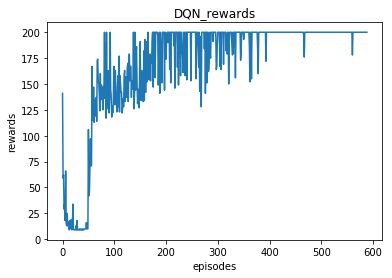

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('DQN_rewards')
ax.set_xlabel('episodes')
ax.set_ylabel('rewards')
episode_reward = np.array(y['episode_reward'])
ax.plot(episode_reward)
plt.savefig('CartPole_DQN_rewards')
plt.show()

In [77]:
len(episode_reward)

589

In [78]:
# 1) Avg. reward over the last 100 consecutive episodes
print('Avg. reward: ', np.mean(episode_reward[100:]))

Avg. reward:  188.867075665


In [81]:
# 2) How many episodes before you encounter 100 consecutive episodes
b4 = False
count = 0
ans = None
for idx, reward in enumerate(episode_reward > 150):
    count = count + 1 if b4 and reward else 0
    if count == 100:
        ans = idx
        break
    b4 = reward

In [82]:
ans

422

### 3) any other informatoins
* The reward for every episodes
* DQN network summery

Are shown abeve.